In [16]:

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
df=pd.read_csv('mobile_data.csv')
df

,X,Y,Z
0,0.014579,-0.014945,1.007415
1,0.014091,0.001891,1.008879
2,0.014823,0.000183,1.011807
3,0.014091,0.001159,1.011807
4,0.014579,-0.012749,1.001071
...,...,...,...
95,0.015799,0.000183,1.010587
96,0.013847,0.000427,1.011319
97,0.016043,0.000427,1.012295
98,0.014823,-0.000793,1.010587


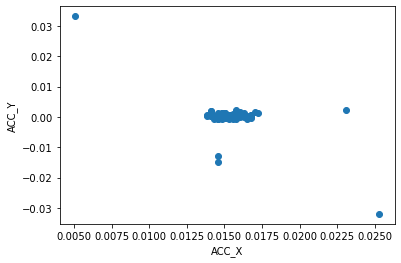

In [19]:
plt.scatter(df['X'],df["Y"])
plt.ylabel("ACC_Y")
plt.xlabel("ACC_X")
plt.show()

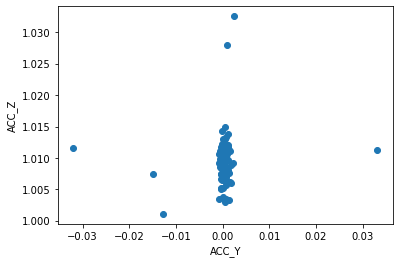

In [20]:
plt.scatter(df['Y'],df["Z"])
plt.ylabel("ACC_Z")
plt.xlabel("ACC_Y")
plt.show()

In [21]:
cols=['X','Y',"Z"]
final_df=df[cols]
final_df

,X,Y,Z
0,0.014579,-0.014945,1.007415
1,0.014091,0.001891,1.008879
2,0.014823,0.000183,1.011807
3,0.014091,0.001159,1.011807
4,0.014579,-0.012749,1.001071
...,...,...,...
95,0.015799,0.000183,1.010587
96,0.013847,0.000427,1.011319
97,0.016043,0.000427,1.012295
98,0.014823,-0.000793,1.010587


In [22]:
scaler=StandardScaler()
scaler.fit(final_df)

StandardScaler()

In [23]:
scaled_data=scaler.transform(final_df)
scaled_data

array([[-0.46128391, -2.9749853 , -0.53177541],
       [-0.73504371,  0.34922248, -0.16545644],
       [-0.32440485,  0.01198401,  0.56720576],
       [-0.73504371,  0.20469171,  0.56720576],
       [-0.46128391, -2.54139317, -2.1192064 ],
       [ 4.3295022 ,  0.44557633,  5.75682218],
       [-0.18752524,  0.20469171,  0.62825905],
       [-0.46128391, -0.03619291, -0.16545644],
       [ 0.22311418, -0.03619291,  0.0787562 ],
       [-0.32440485, -0.08436983, -0.04335012],
       [-0.46128391,  0.06016094, -0.28756277],
       [-0.18752524,  0.10833786,  0.26191556],
       [-0.32440485,  0.15651479,  0.38402188],
       [ 0.49687286, -0.03619291, -0.5928287 ],
       [ 0.22311418, -0.03619291,  0.26191556],
       [-0.18752524, -0.08436983, -0.10440341],
       [-0.18752524,  0.15651479,  0.26191556],
       [ 0.35999324,  0.10833786, -0.65390625],
       [ 1.04439134,  0.25286864, -1.56970355],
       [ 0.35999324,  0.06016094, -1.56970355],
       [ 0.63375304, -0.18072368, -1.508

In [24]:
def find_best_cluster(df,maximum_K):
    cluster_centers=[]
    k_values=[]
    for k in range(1,maximum_K):
        kmean_model=KMeans(n_clusters=k)
        kmean_model.fit(df)
        cluster_centers.append(kmean_model.inertia_)
        k_values.append(k)
    return cluster_centers, k_values

In [25]:
cluster_centers , k_values = find_best_cluster(scaled_data,12)

In [29]:
def elbow_plot(cluster_centers, k_values):
    figure=plt.subplots(figsize=(12,6))
    plt.plot(k_values, cluster_centers, 'o-')
    plt.xlabel("Number of cluster: K")
    plt.ylabel("Cluster Inertia")
    plt.title("elbow plot")
    plt.show()

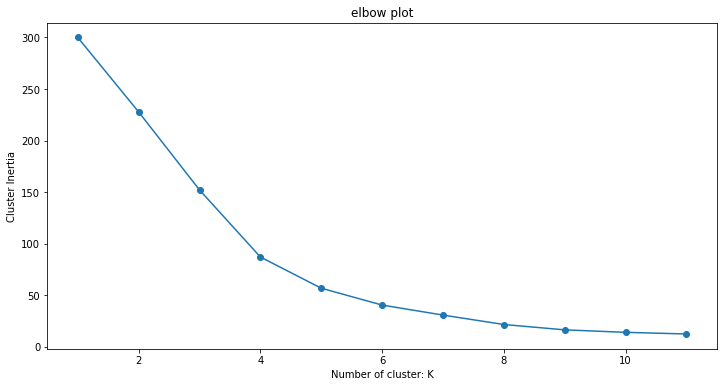

In [30]:
elbow_plot(cluster_centers,k_values)